## QUESTION 1 - Use a sample MovieLens dataset, compute cosine similarity between items, and suggest 3 alternatives to a movie based on past user ratings.

In [10]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load Data
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=['item_id', 'title'])

# Step 2: Create a User-Item Matrix
user_item_matrix = ratings.pivot_table(index='user_id', columns='item_id', values='rating')

# Step 3: Fill missing values with 0
item_matrix = user_item_matrix.T.fillna(0)  

# Step 4: Compute Cosine Similarity between items
similarity_matrix = cosine_similarity(item_matrix)

# Step 5: Create a DataFrame for easy lookup
similarity_df = pd.DataFrame(similarity_matrix, index=item_matrix.index, columns=item_matrix.index)

# Step 6: Define recommendation function
def recommend_similar_movies(movie_id, top_n=3):
    # Get top N similar items (excluding the item itself)
    similar_scores = similarity_df[movie_id].sort_values(ascending=False)[1:top_n+1]
    similar_movies = movies[movies['item_id'].isin(similar_scores.index)]
    similar_movies = similar_movies.copy()
    similar_movies['similarity_score'] = similar_scores.values
    return similar_movies

# Step 7: Try recommending alternatives for a given movie ID
movie_id_to_check = 50  
movie_title = movies[movies['item_id'] == movie_id_to_check]['title'].values[0]
print(f"\nTop 3 alternatives for the movie: {movie_title} (ID: {movie_id_to_check})\n")
recommendations = recommend_similar_movies(movie_id_to_check)
print(recommendations)



Top 3 alternatives for the movie: Star Wars (1977) (ID: 50)

     item_id                            title  similarity_score
171      172  Empire Strikes Back, The (1980)          0.884476
173      174   Raiders of the Lost Ark (1981)          0.764885
180      181        Return of the Jedi (1983)          0.749819


## QUESTION 2 

In [ ]:
#

In [11]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load ratings and movies data
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=['item_id', 'title'])

# Create User-Item Matrix
user_item_matrix = ratings.pivot_table(index='user_id', columns='item_id', values='rating')

# WITHOUT NORMALIZATION
item_matrix_raw = user_item_matrix.T.fillna(0)
cosine_sim_raw = cosine_similarity(item_matrix_raw)
sim_df_raw = pd.DataFrame(cosine_sim_raw, index=item_matrix_raw.index, columns=item_matrix_raw.index)

def recommend_raw(movie_id, top_n=3):
    scores = sim_df_raw[movie_id].sort_values(ascending=False)[1:top_n+1]
    recs = movies[movies['item_id'].isin(scores.index)].copy()
    recs['similarity_score'] = scores.values
    return recs

# WITH NORMALIZATION

# Subtract each user's mean rating (row-wise)
normalized_matrix = user_item_matrix.sub(user_item_matrix.mean(axis=1), axis=0).fillna(0)
item_matrix_norm = normalized_matrix.T

# Compute similarity
cosine_sim_norm = cosine_similarity(item_matrix_norm)
sim_df_norm = pd.DataFrame(cosine_sim_norm, index=item_matrix_norm.index, columns=item_matrix_norm.index)

def recommend_normalized(movie_id, top_n=3):
    scores = sim_df_norm[movie_id].sort_values(ascending=False)[1:top_n+1]
    recs = movies[movies['item_id'].isin(scores.index)].copy()
    recs['similarity_score'] = scores.values
    return recs

# Example: Compare Recommendations for a movie

movie_id_to_check = 50  # e.g., "Star Wars (1977)"
movie_title = movies[movies['item_id'] == movie_id_to_check]['title'].values[0]

print(f"\n🎬 Top 3 similar movies to '{movie_title}' WITHOUT normalization:\n")
print(recommend_raw(movie_id_to_check))

print(f"\n🎬 Top 3 similar movies to '{movie_title}' WITH normalization:\n")
print(recommend_normalized(movie_id_to_check))



🎬 Top 3 similar movies to 'Star Wars (1977)' WITHOUT normalization:

     item_id                            title  similarity_score
171      172  Empire Strikes Back, The (1980)          0.884476
173      174   Raiders of the Lost Ark (1981)          0.764885
180      181        Return of the Jedi (1983)          0.749819

🎬 Top 3 similar movies to 'Star Wars (1977)' WITH normalization:

     item_id                            title  similarity_score
171      172  Empire Strikes Back, The (1980)          0.665330
173      174   Raiders of the Lost Ark (1981)          0.639796
180      181        Return of the Jedi (1983)          0.564267


## QUESTION 3 

In [20]:
#Create a vertically stacked CountPlot of carb using a dark color palette and Apply rotation to x-axis labels if they overlap. 
#Dynamically adjust bar width based on the count.


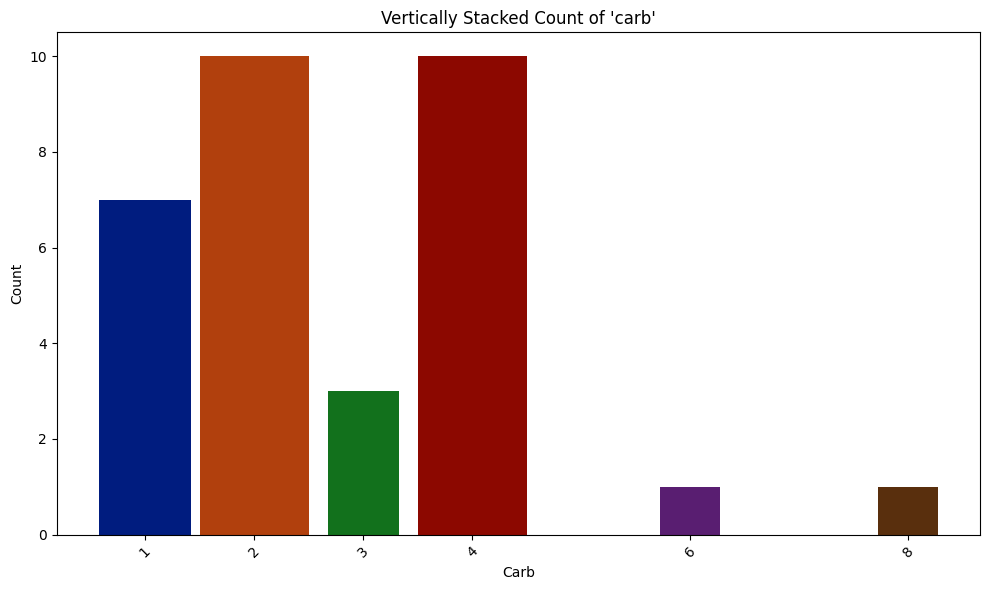

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"C:\Users\aarus\NITJ\mtcars.csv") 

df['carb'] = df['carb'].astype(int)

# Count occurrences
carb_counts = df['carb'].value_counts().sort_index()
carb_values = carb_counts.index
counts = carb_counts.values

# Dynamic bar widths
max_count = counts.max()
bar_widths = [0.5 + (count / max_count) * 0.5 for count in counts]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(x=carb_values, height=counts, width=bar_widths,
               color=sns.color_palette("dark", len(carb_values)))

plt.xlabel("Carb")
plt.ylabel("Count")
plt.title("Vertically Stacked Count of 'carb'")
plt.xticks(ticks=carb_values, labels=carb_values, rotation=45 if len(carb_values) > 5 else 0)

plt.tight_layout()
plt.show()
